# Analysis of hover points

In [1]:
%matplotlib notebook

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from firefly_preprocessing import get_dfs
import scipy
from scipy.fft import fft, fftfreq
from scipy.fft import rfft, rfftfreq
from scipy import signal

import glob
import os

from tools import data_loader
from tools.helper_functions import split_sequences, normalize, get_y_bound

In [2]:
# declare ALL list objects necessary

current = []
voltage = []
rpm = []
p_motor, p_motorpair, p_upper, p_lower  = [], [], [], []
in_throttle = []
out_throttle = []
nsh_cmd = []

time = []

p_total = []
p_upper_total = []
p_lower_total = []

in_throttle_av = []
p_motor_av = []
p_motorpair_av = [] 
p_total_av = []
p_upper_av = []
p_lower_av = []
p_upper_total_av = []
p_lower_total_av = []
delta_rpm = []

x = []
y = []
z = []
u = []
v = []
w = []
p = []
q = []
r = []

dt = []
dy = []
dx = []
dz = []

v_norm = []
dv_norm = []

v_limit = []
dv_limit = []

v_filtered = []
dv_filtered = []

sequence_v = []
sequence_dv = []

In [3]:
# capture output of get_dfs function

In [88]:
%%capture     


#data_directory = "../flight_data/2022-07-07_arboretum/flight_0/hover_10ms_limit"
data_directory = "../flight_data/2022-07-14_ag_field/flight_0/hover_10_limit"

#path = os.getcwd()
csv_files = sorted(glob.glob(os.path.join(data_directory, "*.csv")))

sequence = []
flight_data = pd.DataFrame()

for file in csv_files:
    sequence.append(pd.read_csv(file))
    flight_data = pd.concat([flight_data, pd.read_csv(file)])

In [80]:
# select sequence
sequence = flight_data
i = 0


#current.append(data_loader.get_current(firefly_df[i]))
#voltage.append(data_loader.get_voltage(firefly_df[i]))
#rpm.append(data_loader.get_rpm(firefly_df[i]))

#power_tuple = data_loader.get_power(firefly_df[i])

#p_motor.append(power_tuple[0])
#p_motorpair.append(power_tuple[1])
#p_upper.append(power_tuple[2])
#p_lower.append(power_tuple[3])

#in_throttle.append(data_loader.get_in_throttle(firefly_df[i]))
#out_throttle.append(data_loader.get_out_throttle(firefly_df[i]))
#nsh_cmd.append(firefly_df[i]['optim_nsh_cmd'].values)

time = ((sequence['t'].values - min(sequence['t'].values)) / 10e5)

x = sequence['x'].values
y = sequence['y'].values
z = sequence['z'].values

u = sequence['u'].values
v = sequence['v'].values
w = sequence['w'].values

v_norm = np.sqrt(u ** 2 + v ** 2 + w ** 2)

v_limit.append(0.5)
window = 5
# calculate total power of all motors
#p_total.append(sum(p_motor[i].values()))
#p_upper_total.append(sum(p_upper[i].values()))
#p_lower_total.append(sum(p_lower[i].values()))

# apply moving average filter smooth power signals


#in_throttle_av.append(data_loader.moving_average(in_throttle[i], window))
#p_motor_av.append(data_loader.moving_average(p_motor[i], window))
#p_motorpair_av.append(data_loader.moving_average(p_motorpair[i], window)) 
#p_total_av.append(data_loader.moving_average(p_total[i], window))
#p_upper_av.append(data_loader.moving_average(p_upper[i], window))
#p_lower_av.append(data_loader.moving_average(p_lower[i], window))
#p_upper_total_av.append(data_loader.moving_average(p_upper_total[i], window))
#p_lower_total_av.append(data_loader.moving_average(p_lower_total[i], window))

#delta_rpm.append(data_loader.get_delta_rpm(firefly_df[i], window))



#p.append(ulg_df[i]['ulg_angvel_df']['roll rate'].values)
#q.append(ulg_df[i]['ulg_angvel_df']['pitch rate'].values)
#r.append(ulg_df[i]['ulg_angvel_df']['yaw rate'].values)

#dt.append(time[i][1] - time[i][0])
#dy.append(np.gradient(y[i], dt[i]))
#dx.append(np.gradient(x[i], dt[i]))
#dz.append(np.gradient(z[i], dt[i]))

# get vnorm of sensor and derived velocity
#v_norm.append(ulg_df[i]['ulg_pv_df']['vnorm'].values)
#dv_norm.append(np.sqrt(dx[i]**2 + dy[i]**2 + dz[i]**2))


In [83]:
# global plotting settings
markersize = 3
cmap = cm.cool

## Finding a criteria for hovering

As a first step, we need a criteria to identify hover points in the data. Using the norm of the velocit vector is a simple first approach.

$v_{norm} = ||v|| = \sqrt{\textbf{u}² + \textbf{v}² + \textbf{w}²}$

A fraction of the induced velocity functions as a threshold for $v_{norm}$

$v_i = \sqrt{\frac{W}{2 \rho A}}$

With a vehicle weight of 15 kg, standard air density of 1.225 kg/m³, and four pairs of rotors with 12 in radius, the induced velocity is:

In [84]:
W = 15*9.81
rho = 1.225
A = np.pi * (0.3048**2)
v_i = np.sqrt((2*W)/(rho*4*A))
print("Induced velocity: {} m/s".format(v_i))

Induced velocity: 14.345219306215128 m/s


<IPython.core.display.Javascript object>


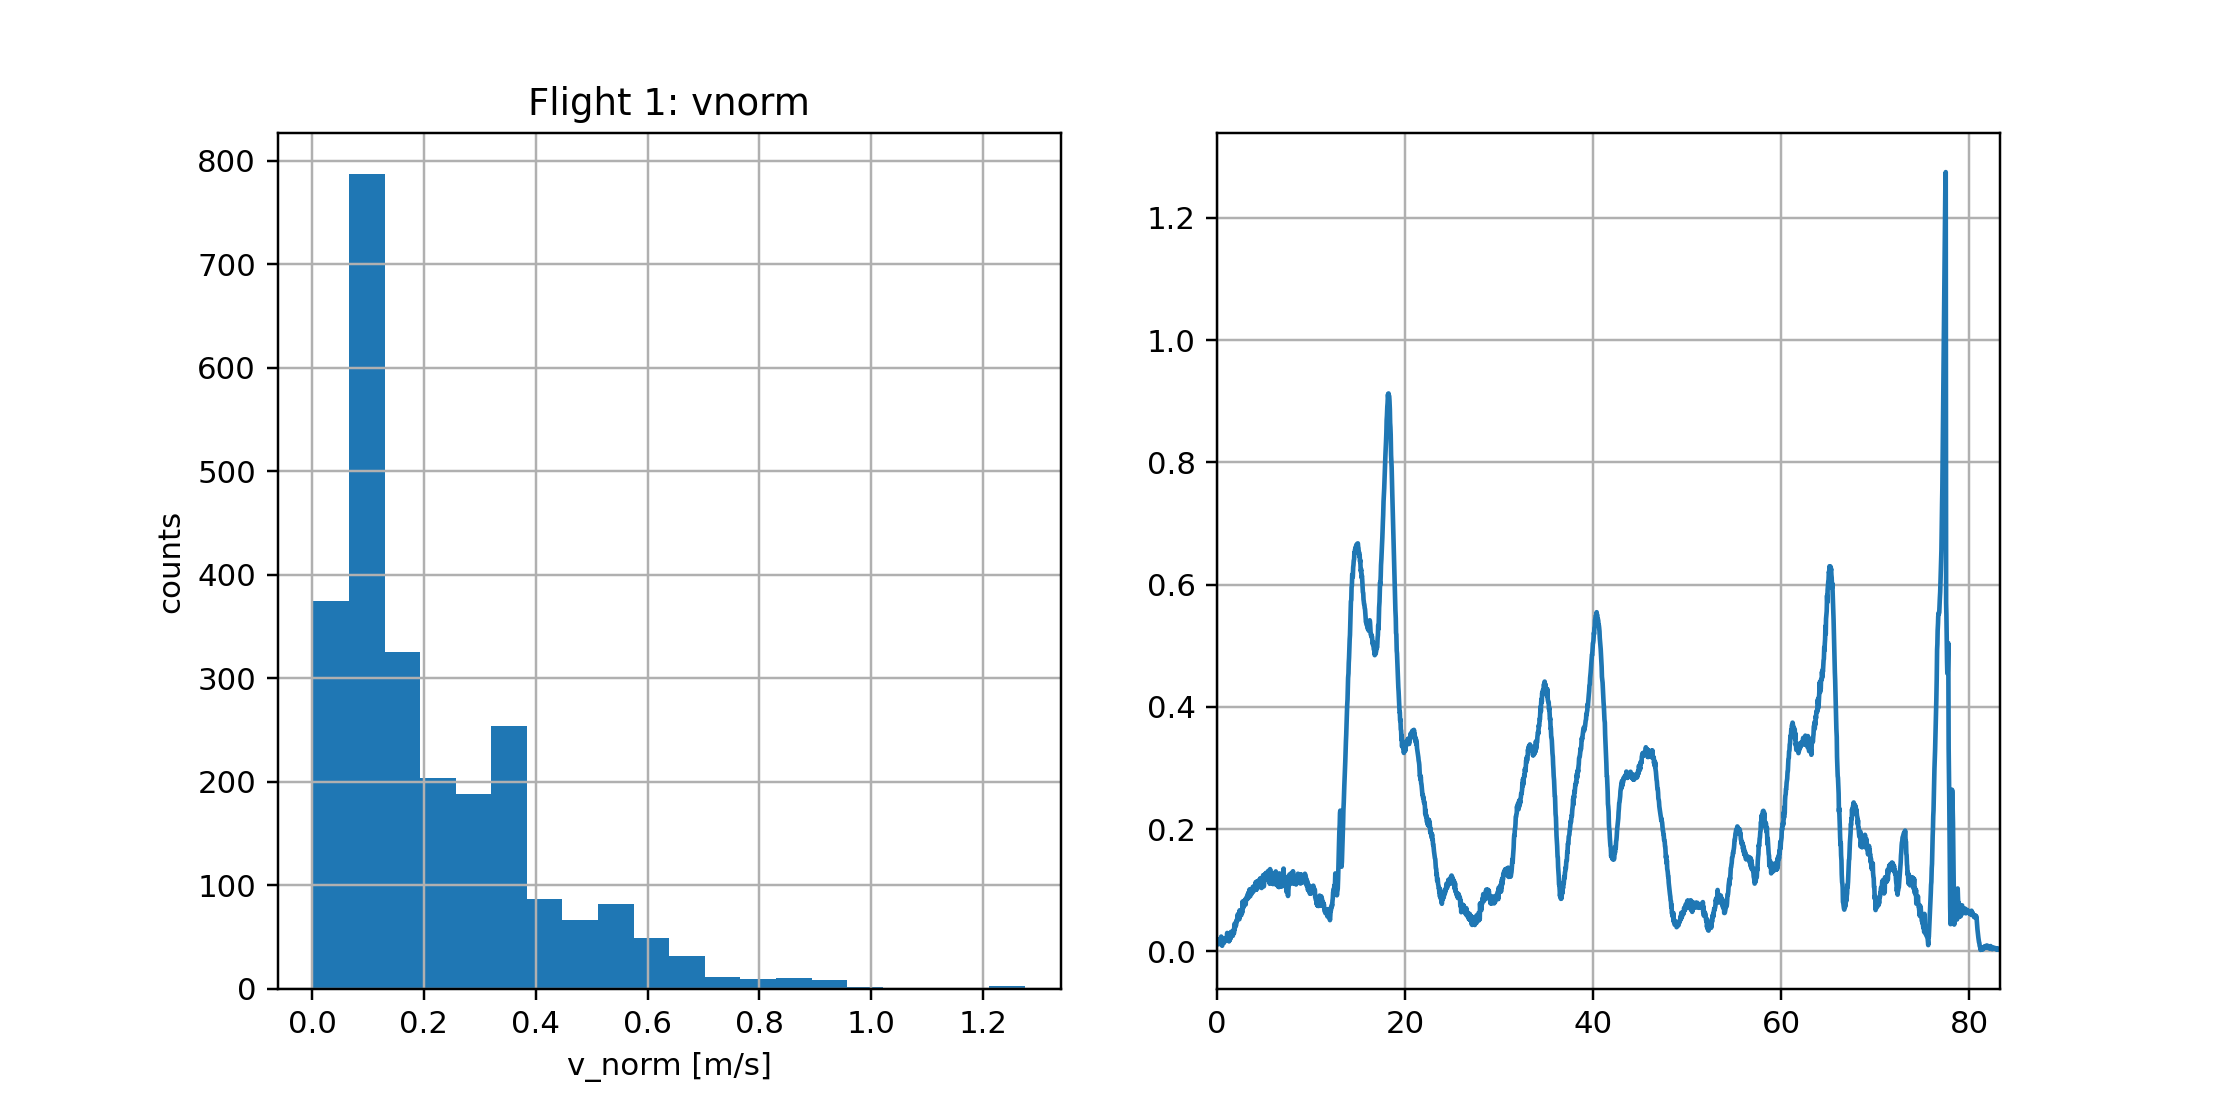

(0.0, 83.259619)

In [85]:
# plot histogram of vnorm with corresponding limit

fig4, ax4 = plt.subplots(1, 2, figsize=(10,5))

# First flight
ax4[0].hist(v_norm, bins=20)
#ax4[0].plot([v_limit[0], v_limit[0]],[0, 200], 'r--', label='v_limit')
ax4[0].set_xlabel('v_norm [m/s]')
ax4[0].set_ylabel('counts')
ax4[0].set_title('Flight 1: vnorm')
#ax4[0].set_xlim(0, 0.4)
ax4[0].grid()
#ax4[0].legend()

# Second flight
ax4[1].plot(time, v_norm)
ax4[1].grid()
ax4[1].set_xlim(min(time),max(time))
#ax4[1][0].plot([v_limit[1], v_limit[1]],[0, 200], 'r--', label='v_limit')
#ax4[1][0].set_xlabel('v_norm [m/s]')
#ax4[1][0].set_ylabel('counts')
#ax4[1][0].set_title('01/24 Flight 2: vnorm')
#ax4[0][0].set_xlim(0, 0.4)
#ax4[1][0].grid()
#ax4[1][0].legend()
#
#ax4[1][1].hist(dv_norm[1], bins=80)
#ax4[1][1].plot([dv_limit[1], dv_limit[1]],[0, 200], 'r--', label='v_limit')
#ax4[1][1].set_xlabel('dv_norm [m/s]')
#ax4[1][1].set_ylabel('counts')
#ax4[1][1].set_title('01/24 Flight 2: vnorm from derivative')
#ax4[1][1].grid()
#ax4[1][1].legend()

<IPython.core.display.Javascript object>


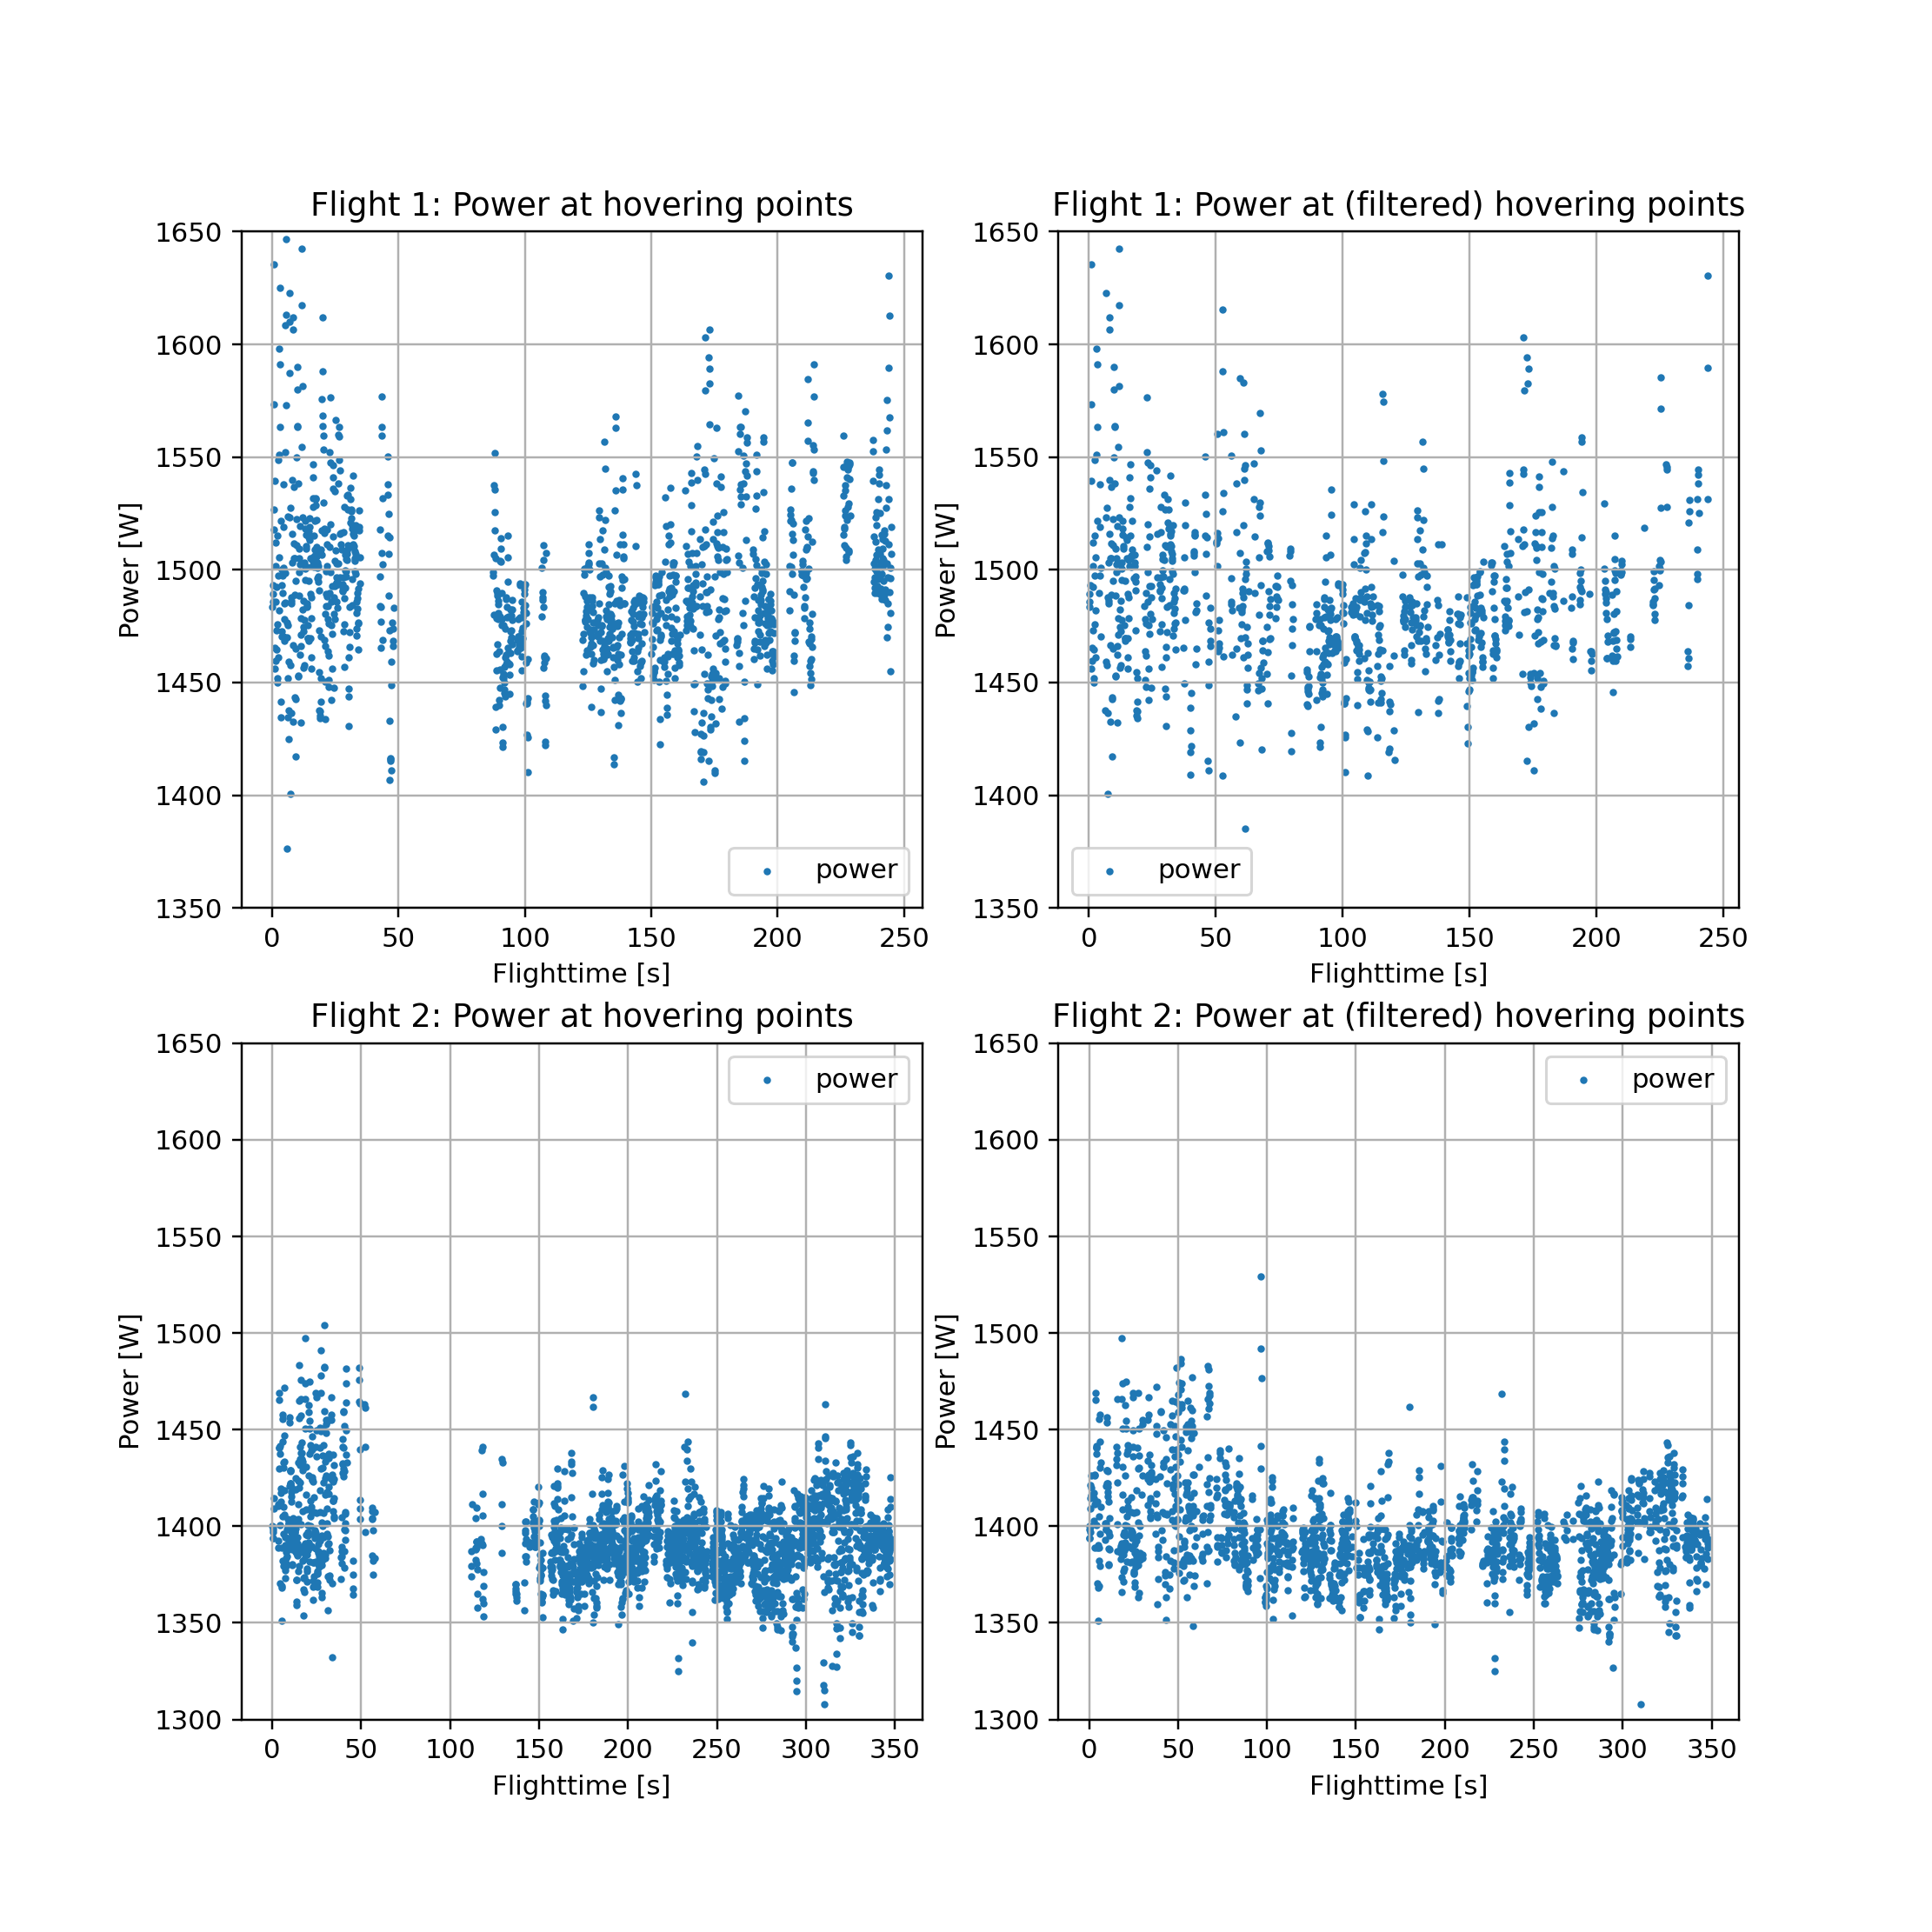

In [27]:
# Plot power data points of filtered values

fig3, ax3 = plt.subplots(2,2, figsize=(10,10))

# Flight 1
ax3[0][0].scatter(time[0][v_filtered[0]], p_total[0][v_filtered[0]], s=markersize, label='power')
#ax3[0][0].set_ylim(min(p_total[0][v_filtered[0]]), max(p_total[0][v_filtered[0]]))
ax3[0][0].set_ylim(1350, 1650)
ax3[0][0].set_title('Flight 1: Power at hovering points')
ax3[0][0].set_xlabel('Flighttime [s]')
ax3[0][0].set_ylabel('Power [W]')
ax3[0][0].grid()
ax3[0][0].legend()

ax3[0][1].scatter(time[0][dv_filtered[0]], p_total[0][dv_filtered[0]], s=markersize, label='power')
#ax3[0][1].set_ylim(min(p_total[0][dv_filtered[0]]), max(p_total[0][dv_filtered[0]]))
ax3[0][1].set_ylim(1350, 1650)
ax3[0][1].set_xlabel('Flighttime [s]')
ax3[0][1].set_ylabel('Power [W]')
ax3[0][1].set_title('Flight 1: Power at (filtered) hovering points')
ax3[0][1].grid()
ax3[0][1].legend()

# Flight2
ax3[1][0].scatter(time[1][v_filtered[1]], p_total[1][v_filtered[1]], s=markersize, label='power')
#ax3[1][0].set_ylim(min(p_total[1][v_filtered[1]]), max(p_total[1][v_filtered[1]]))
ax3[1][0].set_ylim(1300, 1650)
ax3[1][0].set_title('Flight 2: Power at hovering points')
ax3[1][0].set_xlabel('Flighttime [s]')
ax3[1][0].set_ylabel('Power [W]')
ax3[1][0].grid()
ax3[1][0].legend()

ax3[1][1].scatter(time[1][dv_filtered[1]], p_total[1][dv_filtered[1]], s=markersize, label='power')
#ax3[1][1].set_ylim(min(p_total[1][dv_filtered[1]]), max(p_total[1][dv_filtered[1]]))
ax3[1][1].set_ylim(1300, 1650)
ax3[1][1].set_xlabel('Flighttime [s]')
ax3[1][1].set_ylabel('Power [W]')
ax3[1][1].set_title('Flight 2: Power at (filtered) hovering points')
ax3[1][1].grid()
ax3[1][1].legend()



In [28]:
# Split sequences and discard all sequences below a given length
min_length = 20
sequence_v.append(split_sequences(v_filtered[0], min_length))
sequence_v.append(split_sequences(v_filtered[1], min_length))

sequence_dv.append(split_sequences(dv_filtered[0], min_length))
sequence_dv.append(split_sequences(dv_filtered[1], min_length))

print("Flight 1: Found {} sequences with min length of {} data points ({} seconds)"
      .format(len(sequence_v[0]), min_length, min_length / 10))

print("Flight 1: Found {} sequences with min length of {} data points ({} seconds in filtered data)"
      .format(len(sequence_dv[0]), min_length, min_length / 10))

print("Flight 2: Found {} sequences with min length of {} data points ({} seconds)"
      .format(len(sequence_v[1]), min_length, min_length / 10))

print("Flight 2: Found {} sequences with min length of {} data points ({} seconds in filtered data)"
      .format(len(sequence_dv[1]), min_length, min_length / 10))

Flight 1: Found 19 sequences with min length of 20 data points (2.0 seconds)
Flight 1: Found 10 sequences with min length of 20 data points (2.0 seconds in filtered data)
Flight 2: Found 11 sequences with min length of 20 data points (2.0 seconds)
Flight 2: Found 30 sequences with min length of 20 data points (2.0 seconds in filtered data)


In [29]:
# Get length and standard deviation of all sequences

for i in range(2):
    print("Flight {}:".format(i))
    for index, seq in enumerate(sequence_v[i]):
        print("Sequence {} with length {} : sigma={}".format(index, len(seq), np.std(seq)))
    print("\n")

for i in range(2):
    print("Flight {}:".format(i))
    for index, seq in enumerate(sequence_dv[i]):
        print("Sequence {} with length {} : sigma={}".format(index, len(seq), np.std(seq)))
    print("\n")

Flight 0:
Sequence 0 with length 271 : sigma=78.23042886243178
Sequence 1 with length 72 : sigma=20.7826049057058
Sequence 2 with length 78 : sigma=22.51480994071828
Sequence 3 with length 45 : sigma=12.987173159185437
Sequence 4 with length 45 : sigma=12.987173159185437
Sequence 5 with length 110 : sigma=31.752952618614856
Sequence 6 with length 25 : sigma=7.211102550927978
Sequence 7 with length 29 : sigma=8.366600265340756
Sequence 8 with length 41 : sigma=11.832159566199232
Sequence 9 with length 63 : sigma=18.184242262647807
Sequence 10 with length 47 : sigma=13.564659966250536
Sequence 11 with length 54 : sigma=15.58578412100805
Sequence 12 with length 27 : sigma=7.788880963698615
Sequence 13 with length 20 : sigma=5.766281297335398
Sequence 14 with length 85 : sigma=24.535688292770594
Sequence 15 with length 23 : sigma=6.6332495807108
Sequence 16 with length 51 : sigma=14.719601443879744
Sequence 17 with length 29 : sigma=8.366600265340756
Sequence 18 with length 74 : sigma=21.3

In [30]:
# select sequence
flight = 0
sequence = 0
index_v = sequence_v[flight][sequence]
index_dv = sequence_dv[flight][sequence]

<IPython.core.display.Javascript object>


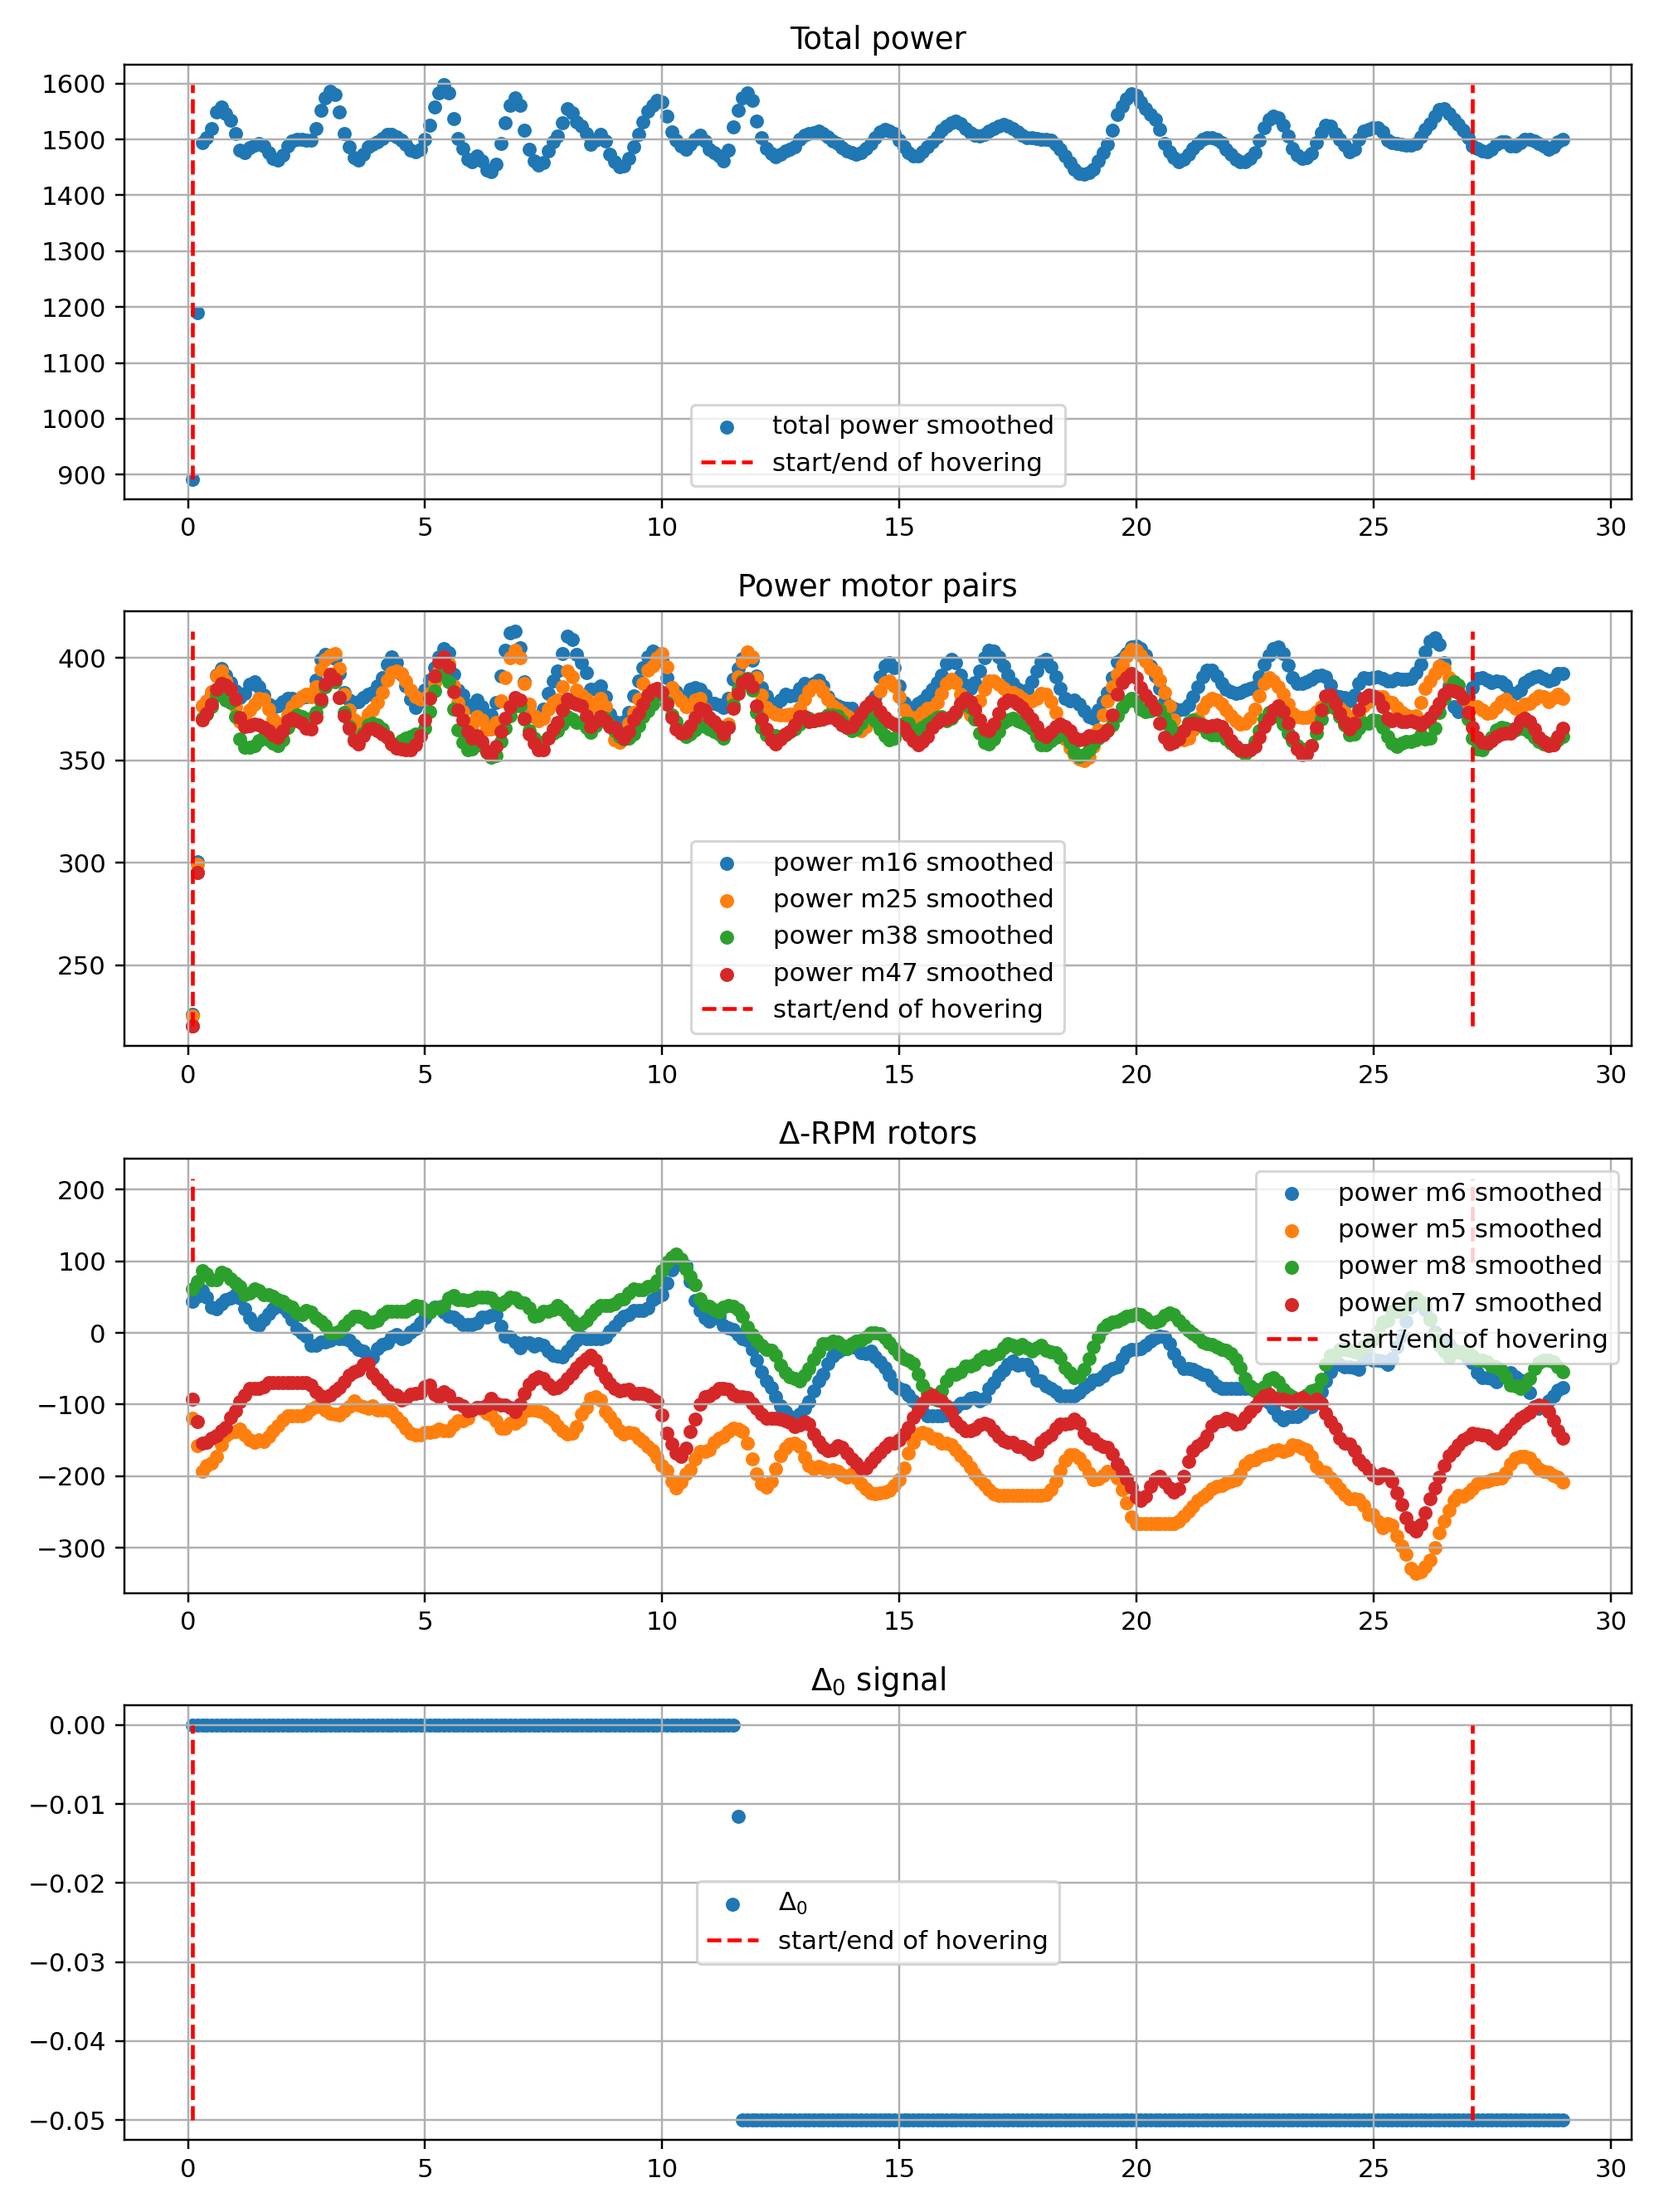

In [31]:
# Plot power and delta RPM command

fig5, ax5 = plt.subplots(4,1, figsize=(9,12))
markersize = 20

# set how many data points before and after hovering should be displayed
t_pre = 20
t_post = 20

index = index_v
t0 = max(0, index[0] - t_pre)
t1 = min(time[flight].size, index[-1] + t_post)

# set boundaries to show hovering period
left_boundary_x = [time[flight][index[0]], time[flight][index[0]]]
right_boundary_x = [time[flight][index[-1]], time[flight][index[-1]]]


ax5[0].set_title('Total power')
ax5[0].scatter(time[flight][t0:t1], p_total_av[flight][t0:t1], s=markersize, label='total power smoothed')
#ax5[0].scatter(time[t0:t1], p_lower_total_av[t0:t1], label='total upper smoothed')
ax5[0].plot(left_boundary_x, get_y_bound(p_total_av[flight], t0, t1), 'r--', label='start/end of hovering')
ax5[0].plot(right_boundary_x, get_y_bound(p_total_av[flight], t0, t1), 'r--')

#ax5[1].set_title('Power upper rotors')
#ax5[1].scatter(time[flight][t0:t1], p_motor_av[flight]['11'][t0:t1], s=markersize, label='power m1 smoothed')
#ax5[1].scatter(time[flight][t0:t1], p_motor_av[flight]['12'][t0:t1], s=markersize, label='power m2 smoothed')
#ax5[1].scatter(time[flight][t0:t1], p_motor_av[flight]['13'][t0:t1], s=markersize, label='power m3 smoothed')
#ax5[1].scatter(time[flight][t0:t1], p_motor_av[flight]['14'][t0:t1], s=markersize, label='power m4 smoothed')
#ax5[1].plot(left_boundary_x, get_y_bound(p_upper_av[flight], t0, t1), 'r--', label='start/end of hovering')
#ax5[1].plot(right_boundary_x, get_y_bound(p_upper_av[flight], t0, t1), 'r--')

ax5[1].set_title('Power motor pairs')
ax5[1].scatter(time[flight][t0:t1], p_motorpair_av[flight]['16'][t0:t1], s=markersize, label='power m16 smoothed')
ax5[1].scatter(time[flight][t0:t1], p_motorpair_av[flight]['25'][t0:t1], s=markersize, label='power m25 smoothed')
ax5[1].scatter(time[flight][t0:t1], p_motorpair_av[flight]['38'][t0:t1], s=markersize, label='power m38 smoothed')
ax5[1].scatter(time[flight][t0:t1], p_motorpair_av[flight]['47'][t0:t1], s=markersize, label='power m47 smoothed')
ax5[1].plot(left_boundary_x, get_y_bound(p_motorpair_av[flight], t0, t1), 'r--', label='start/end of hovering')
ax5[1].plot(right_boundary_x, get_y_bound(p_motorpair_av[flight], t0, t1), 'r--')

ax5[2].set_title('$\Delta$-RPM rotors')
ax5[2].scatter(time[flight][t0:t1], delta_rpm[flight]['16'][t0:t1], s=markersize, label='power m6 smoothed')
ax5[2].scatter(time[flight][t0:t1], delta_rpm[flight]['25'][t0:t1], s=markersize, label='power m5 smoothed')
ax5[2].scatter(time[flight][t0:t1], delta_rpm[flight]['38'][t0:t1], s=markersize, label='power m8 smoothed')
ax5[2].scatter(time[flight][t0:t1], delta_rpm[flight]['47'][t0:t1], s=markersize, label='power m7 smoothed')
ax5[2].plot(left_boundary_x, get_y_bound(p_lower_av[flight], t0, t1), 'r--', label='start/end of hovering')
ax5[2].plot(right_boundary_x, get_y_bound(p_lower_av[flight], t0, t1), 'r--')

ax5[3].set_title('$\Delta_{0}$ signal')
ax5[3].scatter(time[flight][t0:t1], nsh_cmd[flight][t0:t1], s=markersize, label='$\Delta_{0}$')
ax5[3].plot(left_boundary_x, get_y_bound(nsh_cmd[flight], t0, t1), 'r--', label='start/end of hovering')
ax5[3].plot(right_boundary_x, get_y_bound(nsh_cmd[flight], t0, t1), 'r--')


for i in range(4):
    
    ax5[i].grid()
    ax5[i].legend()

fig5.tight_layout()

In [19]:
# map average power of hovering sequence to delta PRM 
avg_delta0_v = []
avg_pow_v = []

avg_delta0_dv = []
avg_pow_dv = []

for fl in range(2):
    
    flight_delta = []
    flight_power = []
    
    for sequence in sequence_v[fl]:
        flight_delta.append(np.average(nsh_cmd[fl][sequence]))
        flight_power.append(np.average(p_total[fl][sequence]))
    
    avg_delta0_v.append(flight_delta)
    avg_pow_v.append(flight_power)
    flight_delta = []
    flight_power = []
    
    for sequence in sequence_dv[fl]:
        flight_delta.append(np.average(nsh_cmd[fl][sequence]))
        flight_power.append(np.average(p_total[fl][sequence]))
    
    avg_delta0_dv.append(flight_delta)
    avg_pow_dv.append(flight_power)


<IPython.core.display.Javascript object>


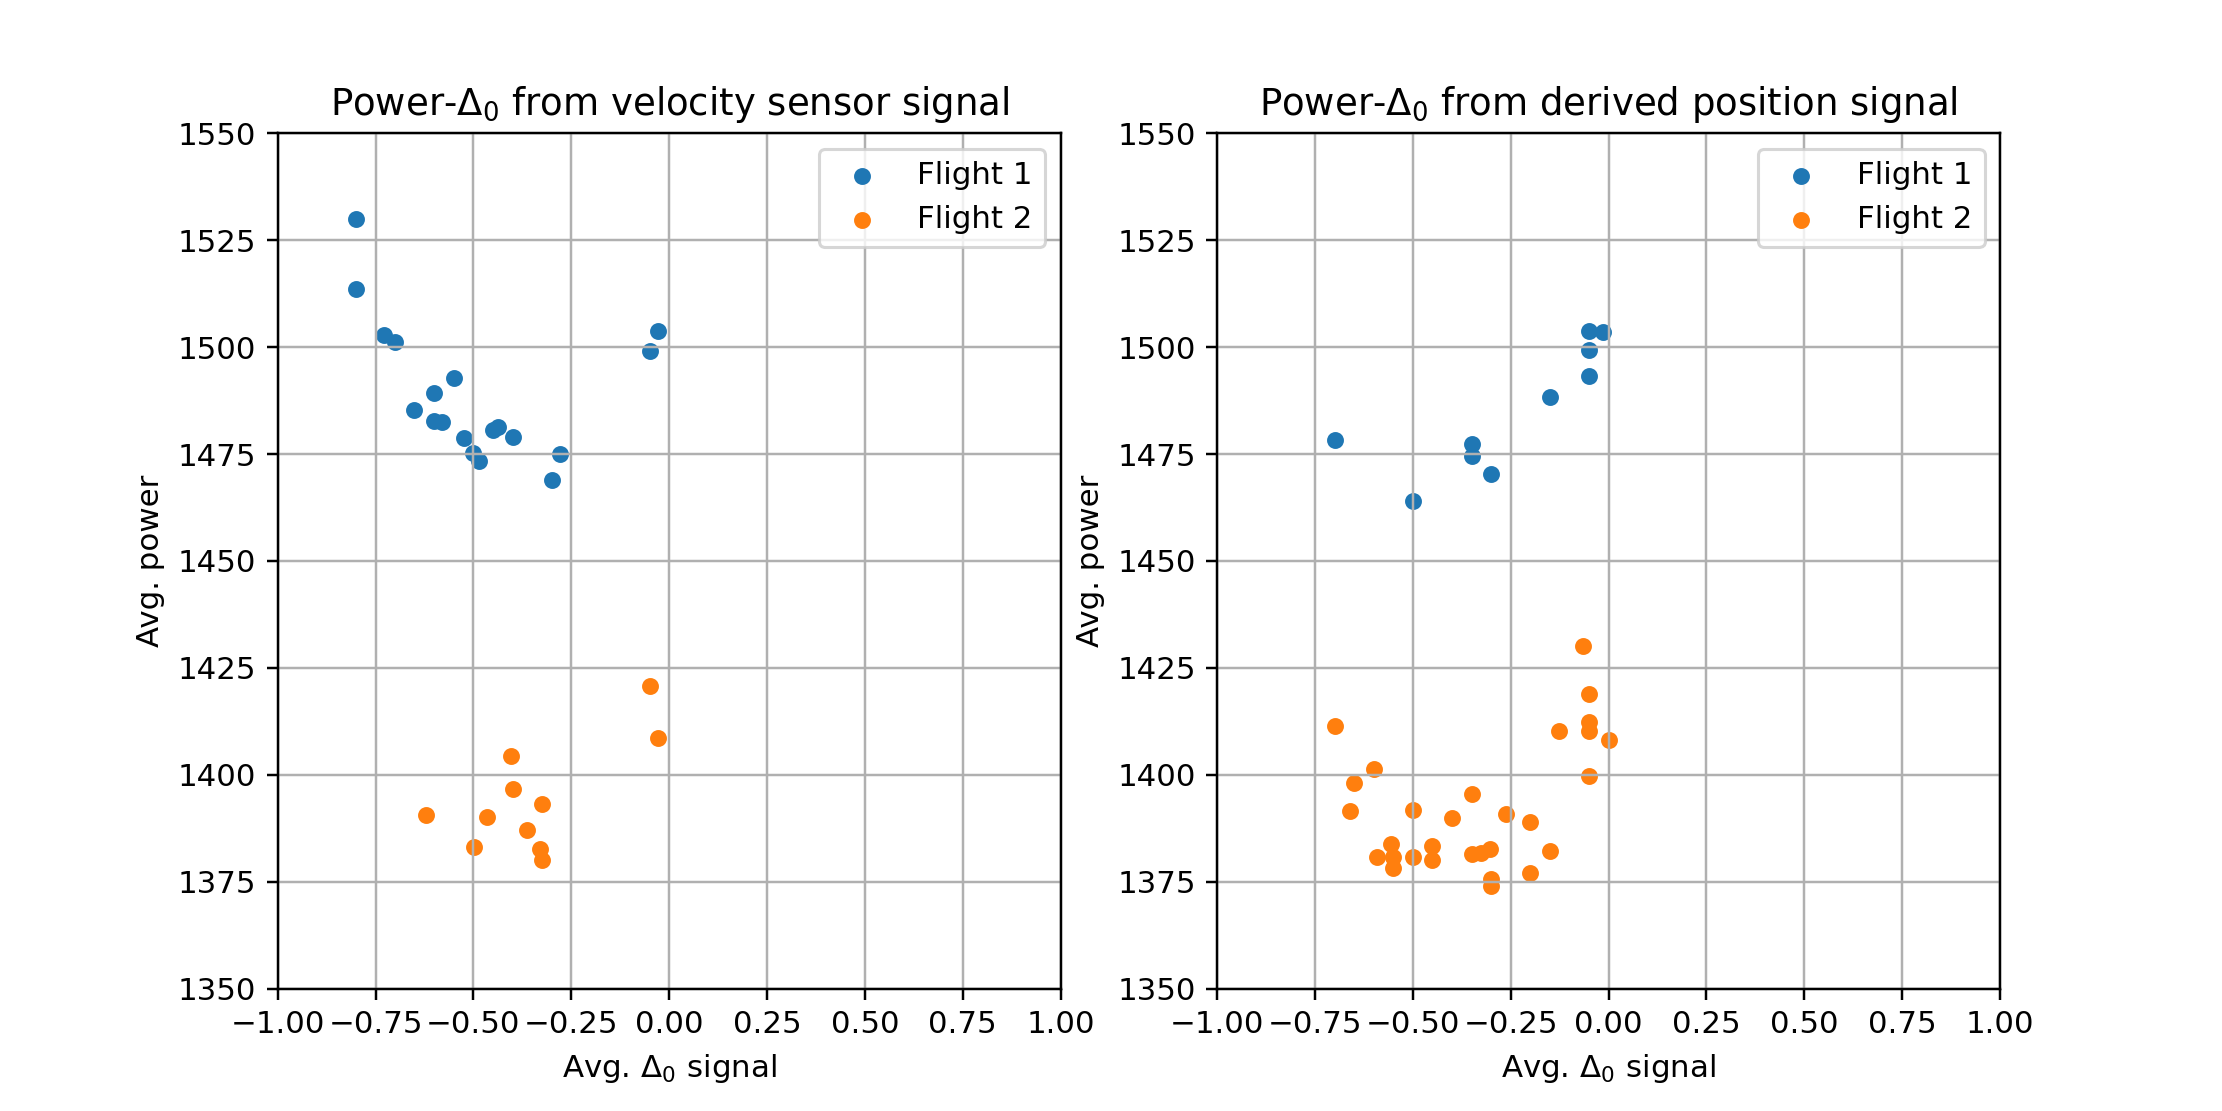

(1350.0, 1550.0)

In [35]:
fig6, ax6 = plt.subplots(1,2, figsize=(10,5))

ax6[0].scatter(avg_delta0_v[0], avg_pow_v[0], s=markersize, label='Flight 1')
ax6[0].scatter(avg_delta0_v[1], avg_pow_v[1], s=markersize, label='Flight 2')
ax6[0].grid()
ax6[0].legend()
ax6[0].set_title('Power-$\Delta_{0}$ from velocity sensor signal')
ax6[0].set_xlabel('Avg. $\Delta_0$ signal')
ax6[0].set_ylabel('Avg. power')
ax6[0].set_xlim(-1, 1)
ax6[0].set_ylim(1350, 1550)

ax6[1].scatter(avg_delta0_dv[0], avg_pow_dv[0], s=markersize, label='Flight 1')
ax6[1].scatter(avg_delta0_dv[1], avg_pow_dv[1], s=markersize, label='Flight 2')
ax6[1].grid()
ax6[1].legend()
ax6[1].set_title('Power-$\Delta_{0}$ from derived position signal')
ax6[1].set_xlabel('Avg. $\Delta_0$ signal')
ax6[1].set_ylabel('Avg. power')
ax6[1].set_xlim(-1, 1)
ax6[1].set_ylim(1350, 1550)